In [1]:
!pip install seaborn==0.13.2
!pip install pyarrow==19.0.1
!pip install tables==3.10.2

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load datasets

In [3]:
gPATHO = r"data/outputs"

sampled_temp_df = pd.read_parquet(os.path.join(gPATHO, "temperature_samples.parquet"))
sampled_wind_df = pd.read_parquet(os.path.join(gPATHO, "wind_speed_samples.parquet"))
sampled_solar_df = pd.read_parquet(os.path.join(gPATHO, "solar_radiation_samples.parquet"))
sampled_demand_df = pd.read_parquet(os.path.join(gPATHO, "demand_samples.parquet"))
loadshed_dict = pd.read_parquet(os.path.join(gPATHO, "loadshed.parquet"))

# Utility and visualisation functions

In [4]:
def load_dict_from_hdf5(file_path):
    """
    Loads an HDF5 file containing multiple DataFrames into a dictionary.

    Parameters:
    - file_path (str): Path to the HDF5 file.

    Returns:
    - dict: Dictionary of DataFrames.
    """
    data_dict = {}
    with pd.HDFStore(file_path, mode='r') as store:
        for key in store.keys():  # Extract dataset names
            data_dict[key.strip('/')] = store[key]
    return data_dict


In [5]:
def plot_sampled_vs_actual(actual_df, samples_dict, variable, city1, city2):
    actual_city1 = actual_df[city1][variable]
    actual_city2 = actual_df[city2][variable]
    
    sampled_city1 = samples_dict[city1]
    sampled_city2 = samples_dict[city2]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(actual_city1, actual_city2, alpha=0.3, label='Actual Data')
    plt.scatter(sampled_city1, sampled_city2, alpha=0.3, label='Sampled Data', marker='x')
    plt.xlabel(f'{variable} in {city1}')
    plt.ylabel(f'{variable} in {city2}')
    plt.title(f'Scatter Plot of {variable}: {city1} vs {city2}')
    plt.legend()
    plt.grid(True)

    plt.show()

In [6]:
def plot_filtered_pairplot(loadshed_dict, city_names=['Neilston', 'Stella West', 'London', 'Deeside']):
    """
    Creates a pairplot of loadshed values for cities, filtering only the samples where 'optim_status' is True.

    Parameters:
    loadshed_dict (dict): A dictionary where:
        - 'optim_status' (list of bool): Indicates whether the optimization was successful.
        - City names (keys) map to lists of loadshed values (floats).
    city_names (list of str): List of city names to include in the pairplot.

    Returns:
    None
    """
    # Filter only the rows where 'optim_status' is True
    filtered_df = loadshed_dict[loadshed_dict['optim_status']]

    # Drop 'optim_status' column as it's not needed in the pairplot
    filtered_df = filtered_df.drop(columns=['optim_status'])
    subset_df = filtered_df[city_names]

    # Create a pairplot with corner=True for an uncluttered lower-triangle view
    pairplot = sns.pairplot(subset_df, corner=True, diag_kind="hist")  # KDE for diagonal histograms


In [7]:
def plot_histogram(loadshed_dict, column_name="total"):
    """
    Creates a histogram of the loadshed values of specified column.

    Parameters:
    loadshed_dict (dict): A dictionary where:
        - 'optim_status' (list of bool): Indicates whether the optimization was successful.
        - 'total' (list of float): Total loadshed values.
    savepath (str): Path to save the histogram image.
    column_name (str): Name of the column to plot the histogram for.

    Returns:
    None
    """
    # Filter only the rows where 'optim_status' is True
    filtered_df = loadshed_dict[loadshed_dict['optim_status']]

    # Plot histogram of the total loadshed values
    plt.figure(figsize=(8, 6))
    sns.histplot(filtered_df[column_name], kde=True)
    plt.xlabel("Total Loadshed (MW)")
    plt.ylabel("Frequency")
    plt.show()

# Visualisation

## Actual vs sampled data

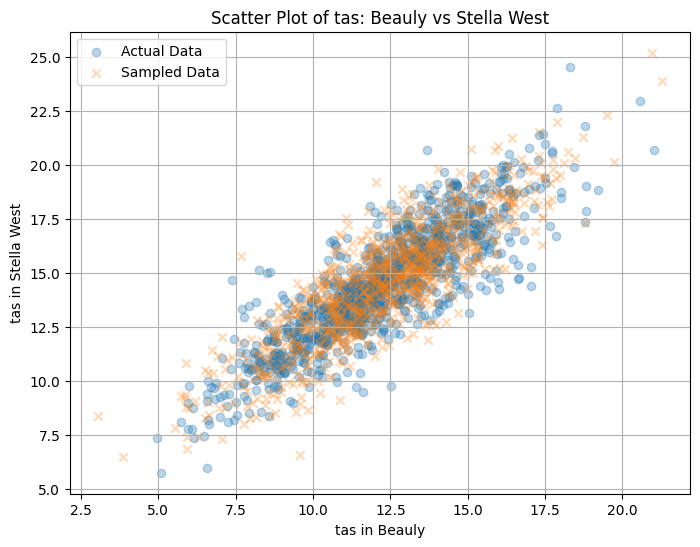

In [8]:
# Temperature
temp_data = load_dict_from_hdf5(os.path.join(gPATHO, "temperature_data.h5"))

plot_sampled_vs_actual(temp_data, sampled_temp_df, 'tas', 'Beauly', 'Stella West')

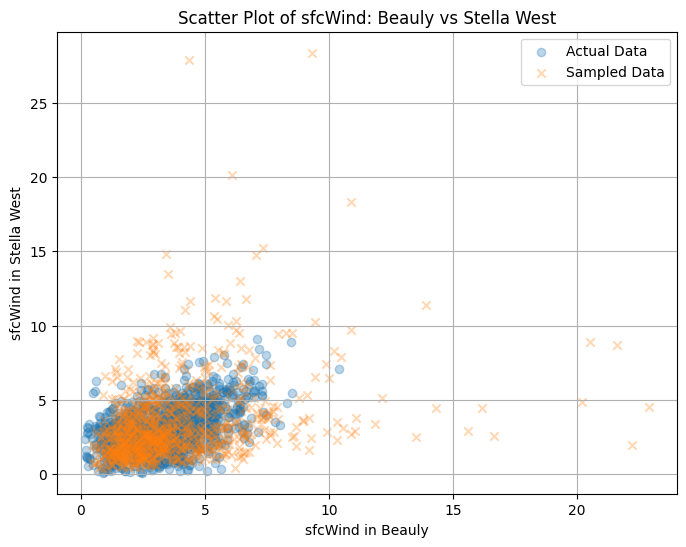

In [9]:
# Wind speed
wind_data = load_dict_from_hdf5(os.path.join(gPATHO, "wind_speed_data.h5"))

plot_sampled_vs_actual(wind_data, sampled_wind_df, 'sfcWind', 'Beauly', 'Stella West')

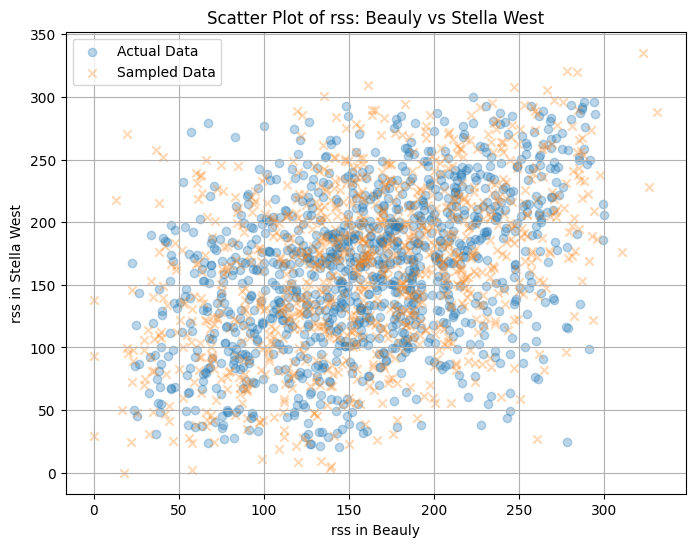

In [10]:
# Solar radiation
solar_data = load_dict_from_hdf5(os.path.join(gPATHO, "solar_data.h5"))

plot_sampled_vs_actual(solar_data, sampled_solar_df, 'rss', 'Beauly', 'Stella West')


## Pair plots of demand surplus after renewable generation

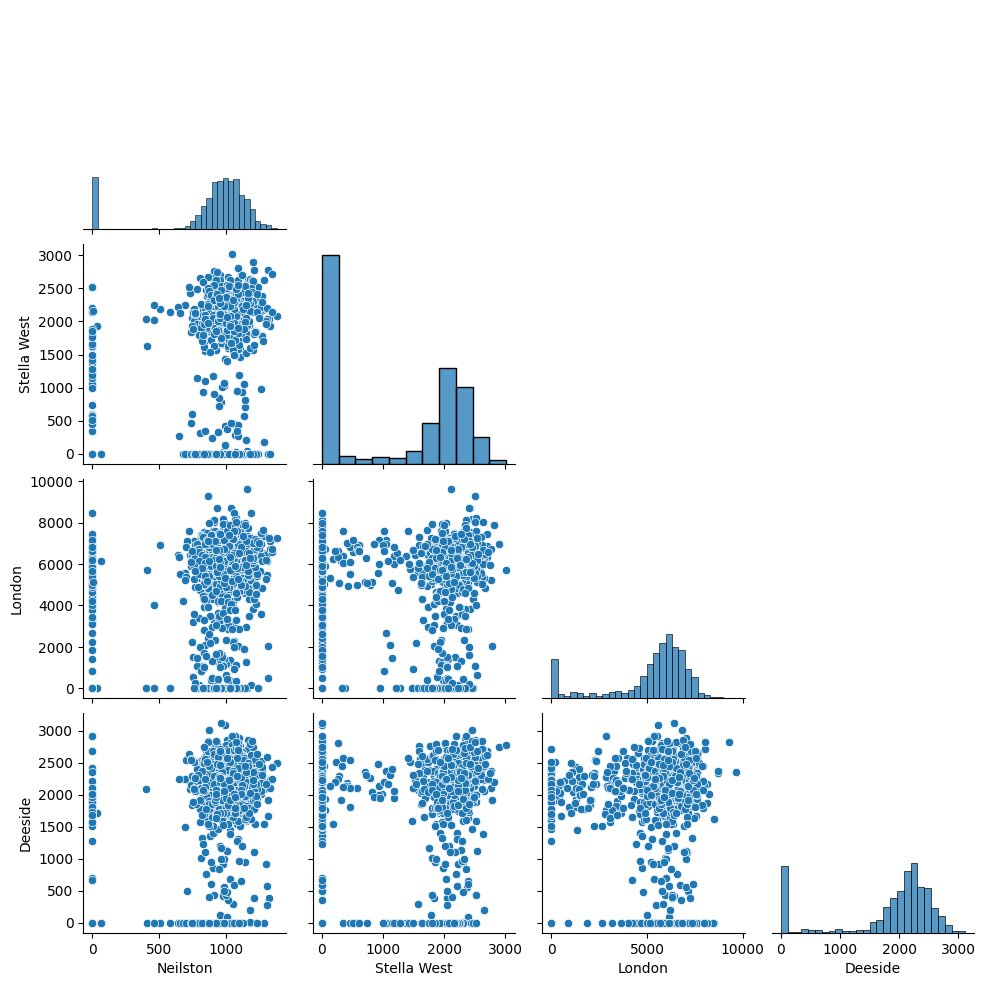

In [11]:
plot_filtered_pairplot(loadshed_dict, city_names=['Neilston', 'Stella West', 'London', 'Deeside'])

## Histogram of total loadshed

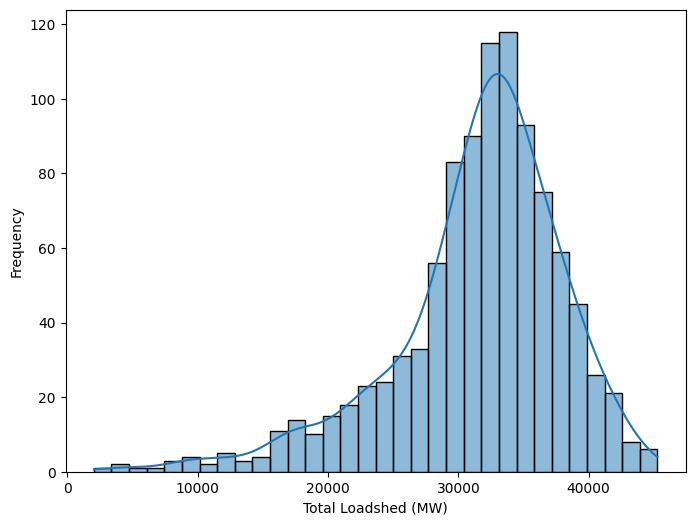

In [12]:
plot_histogram(loadshed_dict, column_name="total")